# Parameters

In [273]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

In [274]:
from numpy import sqrt

In [275]:
import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [276]:
sqrt2=np.sqrt(2)

In [277]:
#Parameters

Theta=np.pi/2
Phi  =0


#Number of atoms

N=1000000


#Basic parameters

gR=1
DeltaR=  0 #gR*sqrt(N)
KapR= 15 *gR*sqrt(( (cos(Theta/2))**2 )*N)

gL=1
DeltaL=0* gR*sqrt(N)
KapL= 15 *gL*sqrt(( (sin(Theta/2))**2 )*N)


### Complex Drivings


fractionRx=0.95
fractionRy=0.0
fractionLx=0.0
fractionLy=0.0


OmegaR    = fractionRx*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))  # fractionR*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))
OmegaR_im = fractionRy*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))

OmegaL    = fractionLx*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))    #fractionL*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))
OmegaL_im = fractionLy*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10)) 




#Magnetic fields

fractionBe=0.05
fractionBg=0.05


Be=fractionBe*(2*(gR**2)*N/(KapR+1e-10))
Bg=fractionBg*(2*(gR**2)*N/(KapR+1e-10))



# Hamiltonian

In [278]:
chiR=DeltaR*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)
chiL=DeltaL*(gL**2)/(DeltaL**2+(KapL/2)**2+1e-10)



GammaR=2*(OmegaR/fractionRx+1e-10)/(N* (cos(Theta/2))**2 +1e-10)
GammaL=2*(OmegaL/(fractionLx+1e-10))/(N*(sin(Theta/2))**2  +1e-10)


In [279]:
print(chiR,chiL,OmegaR,OmegaL,GammaR,GammaL)

0.0 0.0 89.56685895029518 0.0 0.0003771236166332217 0.0


# Time

In [280]:
T1=600
c_fact=2


tng=T1/(N*GammaR)


t_final=tng +2*np.pi/c_fact


print(N*GammaR*t_final,tng)

1784.7687835101426 1.59099025766806


In [281]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import sqrt

import time
from numba import jit




from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix


# Definition of Dicke-Generalized States

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt


#--------------------------------------

State_List=[]

import scipy.special





import time 

import itertools
from itertools import permutations
from numba import jit


In [282]:
pip install sdeint

In [283]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [284]:
def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)

In [285]:


theta = Theta
phi   = Phi


steps1=100000

tf=t_final
t_alt = np.linspace(0,tf,steps1)

print(tf/steps1,N*GammaR*t_final)

4.732582911257853e-05 1784.7687835101426


In [286]:
t_final

4.732582911257853

In [287]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
matrix_array.append(f2z)


f3z=np.zeros((4, 4),dtype=complex_)
f3z[3][3]=1

#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((4,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

In [288]:
fractionRx

0.95

In [289]:


@jit

def f(y, t):

    def Fraction_con_cos(t):
    
        Driving_bef  =0.95
        Driving_after=0.95
    
    
        if t< tng:
            return Driving_bef
        else:
            return Driving_after*np.cos(c_fact*(t-tng))


    def Fraction_con_sin(t):
    
        Driving_bef1  =0.
        Driving_after1=0.95
    
        if t< tng:
            return Driving_bef1
        else:
            return Driving_after1*np.sin(c_fact*(t-tng))

      
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2



    ### Complex Drivings




    fractionLx=0.0
    fractionLy=0.0


    OmegaR    = Fraction_con_cos(t)*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))  # fractionR*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))
    OmegaR_im = Fraction_con_sin(t)*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))

    OmegaL    = fractionLx*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))    #fractionL*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))
    OmegaL_im = fractionLy*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10)) 
    

    
   ##############
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx  +(gR/sqrt2)*s30y
            
    dalpRydt = DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt2)*s30x
             
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt2)*s21y 
        
    dalpLydt = DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt2)*s21x 
         
      
        
    ds10xdt   = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y  -(1/2)*(OmegaR_im*s31x+OmegaL_im*s20x)
            
    ds20xdt = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y   -(1/2)*(OmegaR_im*s32x-OmegaL_im*s10x)+(Be*s30y-Bg*s21y)/2
            
    ds30xdt = (-sqrt2*gR)*alpRy*(N-s2z-s1z-2*s0z)     +OmegaR_im*(2*s0z+s1z+s2z-N)/sqrt2+(Be*s20y-Bg*s31y)/2
            
    ds21xdt = (-sqrt2*gL)*alpLy*(s2z-s1z)             +OmegaL_im*(s1z-s2z)/sqrt2+(Be*s31y-Bg*s20y)/2
            
    ds31xdt = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y   +(1/2)*(OmegaR_im*s10x-OmegaL_im*s32x)  +(Be*s21y-Bg*s30y)/2
            
    ds32xdt = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y  +(1/2)*(OmegaR_im*s20x+OmegaL_im*s31x)
        
    ds10ydt = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x    +(1/2)*(OmegaR_im*s31y-OmegaL_im*s20y)+Bg*( s1z-s0z )/sqrt2
        
    ds20ydt = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x   +(1/2)*(OmegaR_im*s32y+OmegaL_im*s10y)+(Bg*s21x-Be*s30x)/2

    ds30ydt = (2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt2+(Bg*s31x-Be*s20x)/2
                
    ds21ydt = (2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt2 +(Bg*s20x-Be*s31x)/2
        
    ds31ydt = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x    -(1/2)*(OmegaR_im*s10y+OmegaL_im*s32y)+(Bg*s30x-Be*s21x)/2
            
    ds32ydt = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x    +(1/2)*(-OmegaR_im*s20y+OmegaL_im*s31y)+Be*(N-s0z-s1z-2*s2z)/sqrt2
        
    ds0zdt = (sqrt2)*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )   -OmegaR_im*s30x/sqrt2 +Bg*s10y/sqrt2
        
    ds1zdt = (sqrt2)*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )   -OmegaL_im*s21x/sqrt2 -Bg*s10y/sqrt2
            
    ds2zdt = (-sqrt2)*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y ) +OmegaL_im*s21x/sqrt2 +Be*s32y/sqrt2
               


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,19))
    Arr[0][-1]=1
    Arr[0][-2]=1
    Arr[0][-3]=1
    Arr[0][-4]=1
    
    return diag(Arr[0])




In [290]:
@jit

def random_vect(KapR=KapR,KapL=KapL):
    Hu=np.zeros((1,19))
    Hu[0][-1]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-3]=np.sqrt(KapR/4)*np.random.normal()
    Hu[0][-4]=np.sqrt(KapR/4)*np.random.normal()
    
    return Hu



In [291]:
inv_frac=120

Major_index=int(steps1/inv_frac)
#New_column=zeros((steps1//Major_index, int(15*16/2)))
New_column=zeros((steps1//Major_index, int(30)))


In [292]:
def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result






t_reduced=np.zeros((1,steps1//Major_index))

for j in range(steps1//Major_index):
    t_reduced[0][j]=t_alt[Major_index*j]
    
    #for k in range(Ns//Major_index):
    #    y_reduced[k]=y[k*Major_index]
    
time_alt=t_reduced[0]


#  t_reduced[0] is the reduced time vector

# Mean-Field

In [293]:
T1/(N*GammaR)

1.59099025766806

In [294]:
Stochastic=0


@jit




def mfstratHeunImpII(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;

    
    for n in range(0, Ns-1):
        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn
            
        #else:

        #    fn = f2(yn, tn)
        #    ybar = yn + fn*h  + Stochastic*Rand_vectn
        #    fnbar = f2(ybar, tnp1)
        #    y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn



    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))

    total_elements=10

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k
        
    return y_reduced




@jit

def SDE_sol_mf():

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    
    y0=list(Sum_TWA.flatten())+[0*random.normal(0, 0.5),0*random.normal(0, 0.5),0*random.normal(0, 0.5),0*random.normal(0, 0.5)]
    
    return mfstratHeunImpII(f, GG, y0, t_alt)

In [295]:
MF_res=SDE_sol_mf()

<ipython-input-294-42df21afce6f>:91: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "SDE_sol_mf" failed type inference due to: Unknown attribute 'multivariate_normal' of type Module(<module 'numpy.random' from '/usr/local/lib/python3.7/dist-packages/numpy/random/__init__.py'>)

File "<ipython-input-294-42df21afce6f>", line 95:
def SDE_sol_mf():
    <source elided>

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    ^

During: typing of get attribute at <ipython-input-294-42df21afce6f> (95)

File "<ipython-input-294-42df21afce6f>", line 95:
def SDE_sol_mf():
    <source elided>

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "SDE_sol_mf" was compiled in object mode without forceobj=True.

File "<ipython-input-294-42df21afce6f>

In [296]:

import math


def arctan_array(x_array,y_array):
    
    Resu_arc=[]
    
    for j in range(len(x_array)):
        if y_array[j]==0 and x_array[j]==0:
            Resu_arc.append(0)
        else:
            angl=math.atan2(y_array[j],x_array[j])

            Resu_arc.append(angl%(2*np.pi))

    
    return Resu_arc

In [297]:
Cov_mat_list_alt=[]

for j in range(15):
    Cov_mat_list_alt.append(list(N*real(Cov_mat[j]))) 

Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f0z,f1z,f2z]
    

ind_shap=len(Matrix_Basis)

     

# SH DissTWA

In [298]:
Stochastic=1


@jit



def stratHeunImpII(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):

        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn
            
        #else:

        #    fn = f2(yn, tn)
        #    ybar = yn + fn*h  + Stochastic*Rand_vectn
        #    fnbar = f2(ybar, tnp1)
        #    y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn


    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))
    Second_moment=[]

    total_elements=10

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k
        
        

        Second_moment.append(np.array(y_k[0:ind_shap]).reshape(ind_shap,1)@(np.array(y_k[0:ind_shap]).reshape(1,ind_shap)))
        

    return y_reduced, Second_moment

In [299]:
@jit

def SDE_sol():
    
    Sum_TWA=np.random.multivariate_normal(N*real(Miu), Cov_mat_list_alt, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return stratHeunImpII(f, GG, y0, t_alt)

In [300]:


from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera,N=N):
    Results =SDE_sol()
    
    Result_First  =Results[0]
    Second_moment =Results[1]
    print(0)

    for j in range(itera-1):
        Trayec=SDE_sol()
        Result_First  =add(Result_First  ,Trayec[0])
        Second_moment =add(Second_moment, Trayec[1])

        print(j+1)
    
    return Result_First/itera, Second_moment/itera

In [301]:
import time
t0=time.time()

itera=3000

Result_varTWA_Col_SDE = averages_sde(itera=itera,N=N)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-300-10208c27773c>:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol at 0x7f5e80cb4950>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol at 0x7f5e80cb4950>))
During: typing of call at <ipython-input-300-10208c27773c> (12)


File "<ipython-input-300-10208c27773c>", line 12:
def averages_sde(itera=itera,N=N):
    Results =SDE_sol()
    ^

  @jit
<ipython-input-300-10208c27773c>:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-300-10208c27773c>", line 18:
def averages_sde(itera=itera,N=N):
    <source elided>

    for j in range(itera-1):
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/nu

0


<ipython-input-300-10208c27773c>:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol at 0x7f5e80cb4950>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol at 0x7f5e80cb4950>))
During: typing of call at <ipython-input-300-10208c27773c> (19)


File "<ipython-input-300-10208c27773c>", line 19:
def averages_sde(itera=itera,N=N):
    <source elided>
    for j in range(itera-1):
        Trayec=SDE_sol()
        ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "averages_sde" was compiled in object mode without forceobj=True.

File "<ipython-input-300-10208c27773c>", line 18:
def averages_sde(itera=itera,N=N):
    <source elided>

    for j in range(itera-1):
    ^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mod

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [302]:

def Square_mean(Averages):
    Averages=Averages[0:len(Matrix_Basis)].reshape(len(Matrix_Basis),1)
    
    return  Averages*(Averages.T)

Cov_series=[]

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series.append(   np.array(Result_varTWA_Col_SDE[1][j] - Square_mean(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )



len(Cov_series)

Conserved=[]
Ones=[]


for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig(Cov_series[j])[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Conserved.append(Eigenvalues[1]*Eigenvalues[2])
    Ones.append(1)
    

#plt.plot(Conserved)
#plt.plot(Ones)

In [303]:


Eig_1=[]
Eig_2=[]
Eig_3=[]
Eig_4=[]
Eig_5=[]
Eig_6=[]

for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig( Cov_series[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1.append(Eigenvalues[-1])
    Eig_2.append(Eigenvalues[-2])
    Eig_3.append(Eigenvalues[-3])
    Eig_4.append(Eigenvalues[-4])
    Eig_5.append(Eigenvalues[-5])
    Eig_6.append(Eigenvalues[-6])

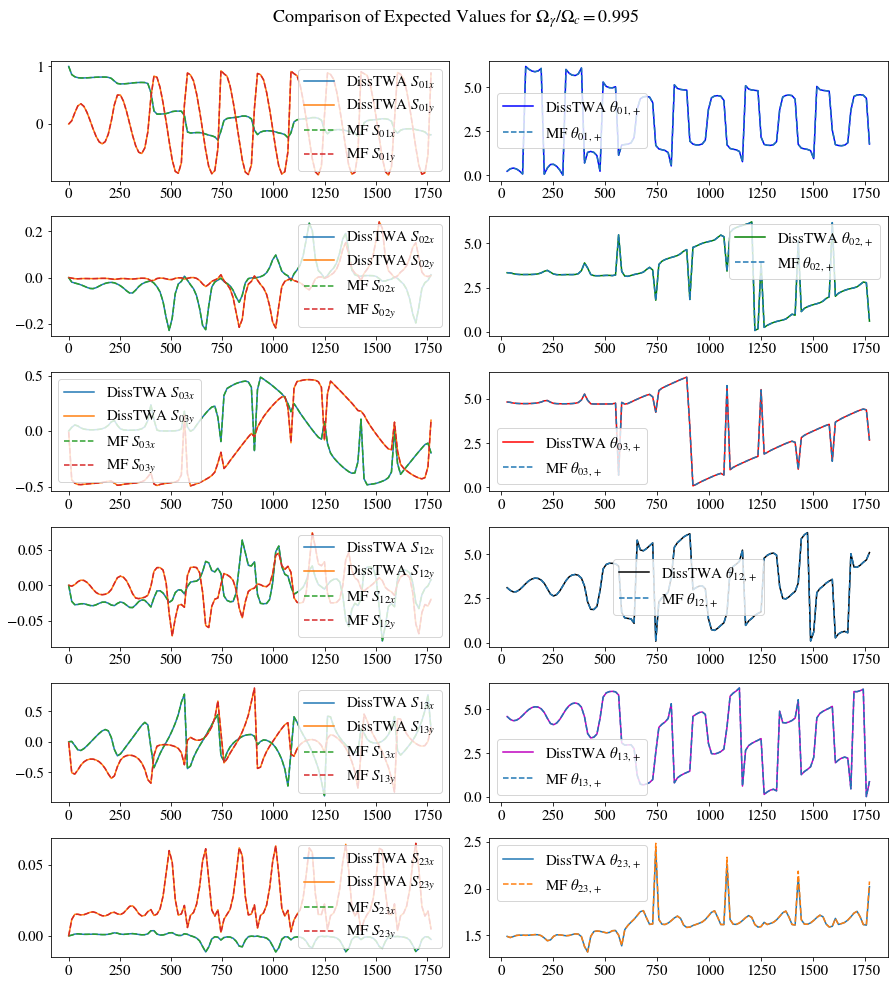

In [304]:
decimals=3
start=2


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12)) = plt.subplots(6, 2,figsize=(15,15))
fig.suptitle('Comparison of Expected Values for $\Omega_{\gamma}/\Omega_c=0.995$')



left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)/(N/2)

ax1.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{01x}$")
ax1.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{01y}$")
ax1.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{01x}$")
ax1.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{01y}$")
ax1.legend()


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
ax2.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'b',label="DissTWA $\\theta_{01,+}$")

yeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)/(N/2)
ax2.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{01,+}$")

ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
ax4.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'g',label="DissTWA $\\theta_{02,+}$")

yeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)/(N/2)
ax4.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{02,+}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
ax6.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'r',label="DissTWA $ \\theta_{03,+}$")

yeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)/(N/2)
ax6.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{03,+}$")
ax6.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
ax8.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'k',label="DissTWA $\\theta_{12,+}$")

yeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)/(N/2)
ax8.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{12,+}$")
ax8.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
ax10.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'m',label="DissTWA $\\theta_{13,+}$")

yeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)/(N/2)
ax10.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{13,+}$")
ax10.legend()


yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
Theta23=arctan_array(xeSH ,yeSH)[start:]
Res_red=[]

for j in range(len(Theta23)):
    Res_red.append(Theta23[j]%(2*np.pi-0.01))


ax12.plot(N*GammaR*time_alt[start:], Res_red,'',label="DissTWA $\\theta_{23,+}$")


yeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)/(N/2)
ax12.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{23,+}$")
ax12.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)/(N/2)

ax3.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{02x}$")
ax3.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{02y}$")
ax3.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{02x}$")
ax3.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{02y}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)/(N/2)

ax5.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{03x}$")
ax5.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{03y}$")
ax5.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{03x}$")
ax5.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{03y}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)/(N/2)

ax7.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{12x}$")
ax7.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{12y}$")
ax7.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{12x}$")
ax7.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{12y}$")
ax7.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)/(N/2)

ax9.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{13x}$")
ax9.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{13y}$")
ax9.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{13x}$")
ax9.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{13y}$")
ax9.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)/(N/2)

ax11.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{23x}$")
ax11.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{23y}$")
ax11.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{23x}$")
ax11.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{23y}$")
ax11.legend()


#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

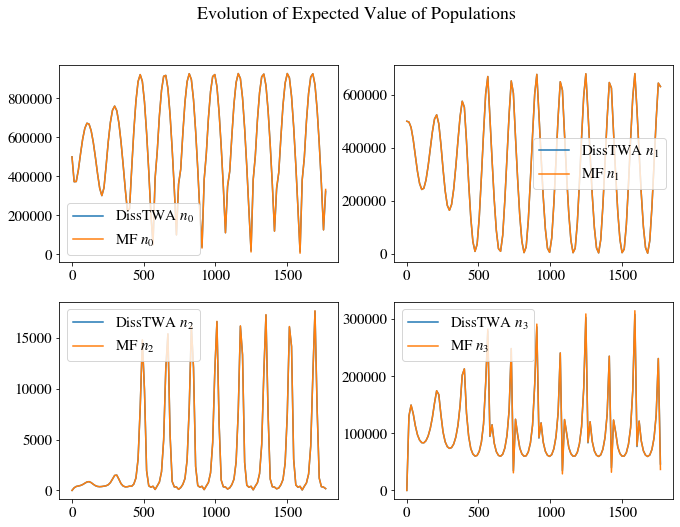

In [305]:
decimals=3


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Evolution of Expected Value of Populations')

yeSH0=np.around(Result_varTWA_Col_SDE[0][:,12],decimals=decimals)
mfyeSH0=np.around(MF_res[:,12],decimals=decimals)
ax1.plot(N*time_alt*GammaR, yeSH0,label="DissTWA $n_{0}$")
ax1.plot(N*time_alt*GammaR, mfyeSH0,label="MF $n_{0}$")
ax1.legend()

yeSH1=np.around(Result_varTWA_Col_SDE[0][:,13],decimals=decimals)
mfyeSH1=np.around(MF_res[:,13],decimals=decimals)
ax2.plot(N*time_alt*GammaR, yeSH1,label="DissTWA $n_{1}$")
ax2.plot(N*time_alt*GammaR, mfyeSH1,label="MF $n_{1}$")
ax2.legend()

yeSH2=np.around(Result_varTWA_Col_SDE[0][:,14],decimals=decimals)
mfyeSH2=np.around(MF_res[:,14],decimals=decimals)
ax3.plot(N*time_alt*GammaR, yeSH2,label="DissTWA $n_{2}$")
ax3.plot(N*time_alt*GammaR, mfyeSH2,label="MF $n_{2}$")
ax3.legend()


yeSH3=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)
mfyeSH3=np.around(N-MF_res[:,14]-MF_res[:,13]-MF_res[:,12],decimals=decimals)
ax4.plot(N*time_alt*GammaR, yeSH3,label="DissTWA $n_{3}$")
ax4.plot(N*time_alt*GammaR, mfyeSH3,label="MF $n_{3}$")
ax4.legend()


#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

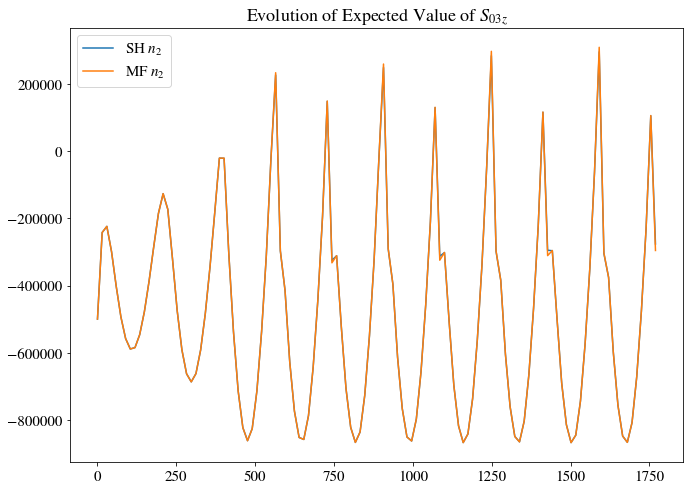

In [306]:

plt.title("Evolution of Expected Value of $S_{03z}$")

plt.plot(N*time_alt*GammaR, yeSH3-yeSH0,label="SH $n_{2}$")
plt.plot(N*time_alt*GammaR, mfyeSH3-mfyeSH0,label="MF $n_{2}$")
plt.legend()

In [307]:
N

1000000

In [308]:
(yeSH3-yeSH0)[-1]

-276310.719

In [309]:
-(N/2)*np.sqrt(1-fractionRx**2 )

-156124.94995995998

In [310]:
fractionRx

0.95

In [311]:
print( "We have a porcentual difference of " ,np.abs(100*(yeSH3-yeSH0)[-1]/(   (N/2)*np.sqrt(1-fractionRx**2 )  )+100).round(4),"%")

We have a porcentual difference of  76.9805 %


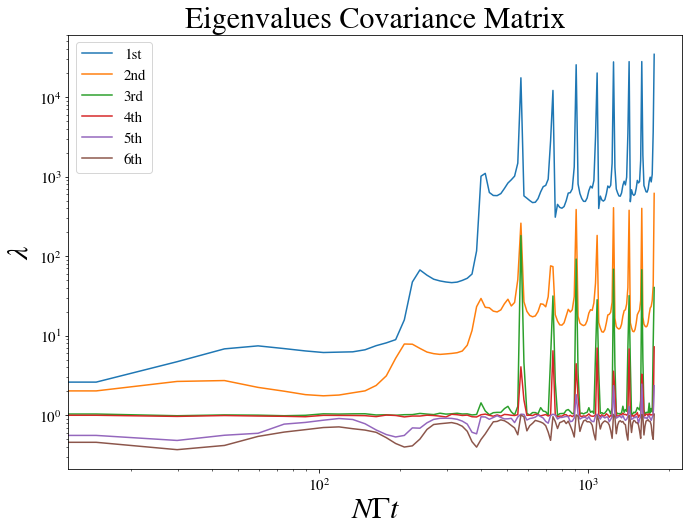

In [312]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_1[:indep]),label="1st")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_2[:indep]),label="2nd")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_3[:indep]),label="3rd")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_4[:indep]),label="4th")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_5[:indep]),label="5th")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_6[:indep]),label="6th")
plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.savefig('foo.pdf')

In [313]:
np.min(Eig_6[:indep])

(0.3689568099032463+0j)

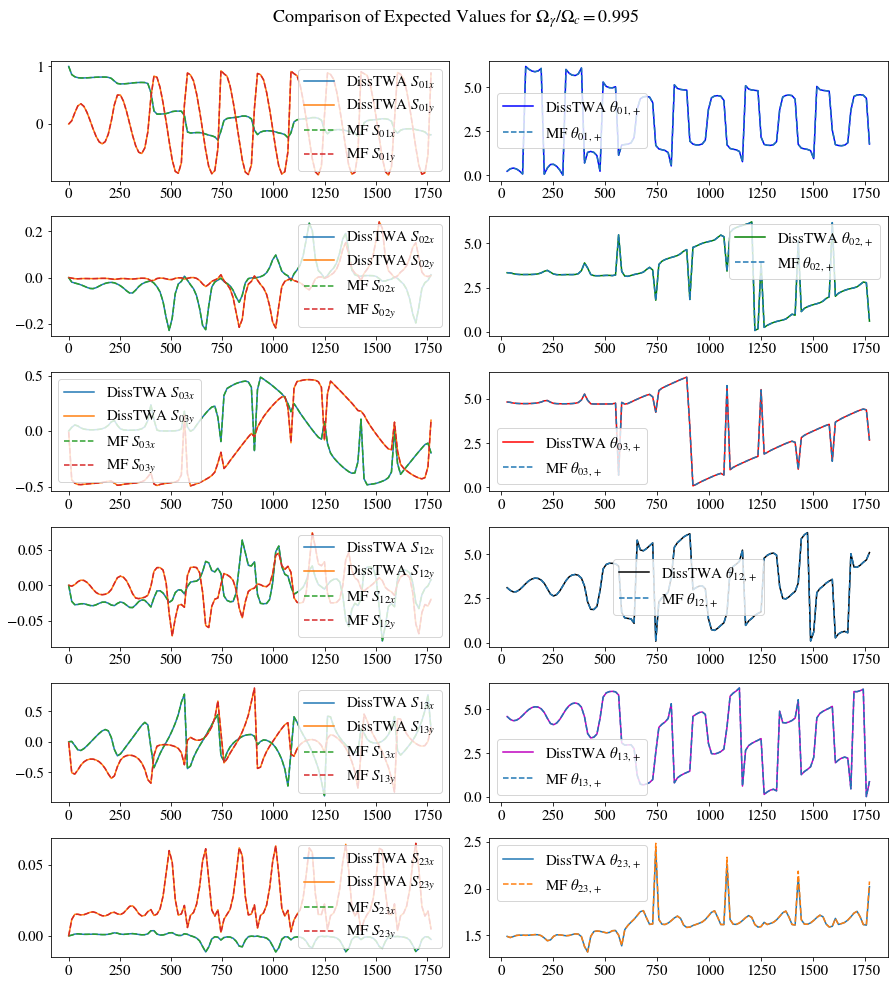

In [314]:
decimals=3
start=2


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12)) = plt.subplots(6, 2,figsize=(15,15))
fig.suptitle('Comparison of Expected Values for $\Omega_{\gamma}/\Omega_c=0.995$')



left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)/(N/2)

ax1.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{01x}$")
ax1.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{01y}$")
ax1.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{01x}$")
ax1.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{01y}$")
ax1.legend()


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
ax2.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'b',label="DissTWA $\\theta_{01,+}$")

yeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)/(N/2)
ax2.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{01,+}$")

ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
ax4.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'g',label="DissTWA $\\theta_{02,+}$")

yeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)/(N/2)
ax4.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{02,+}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
ax6.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'r',label="DissTWA $ \\theta_{03,+}$")

yeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)/(N/2)
ax6.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{03,+}$")
ax6.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
ax8.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'k',label="DissTWA $\\theta_{12,+}$")

yeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)/(N/2)
ax8.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{12,+}$")
ax8.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
ax10.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'m',label="DissTWA $\\theta_{13,+}$")

yeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)/(N/2)
ax10.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{13,+}$")
ax10.legend()


yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
Theta23=arctan_array(xeSH ,yeSH)[start:]
Res_red=[]

for j in range(len(Theta23)):
    Res_red.append(Theta23[j]%(2*np.pi-0.01))


ax12.plot(N*GammaR*time_alt[start:], Res_red,'',label="DissTWA $\\theta_{23,+}$")


yeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)/(N/2)
ax12.plot(N*GammaR*time_alt[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{23,+}$")
ax12.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)/(N/2)

ax3.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{02x}$")
ax3.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{02y}$")
ax3.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{02x}$")
ax3.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{02y}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)/(N/2)

ax5.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{03x}$")
ax5.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{03y}$")
ax5.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{03x}$")
ax5.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{03y}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)/(N/2)

ax7.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{12x}$")
ax7.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{12y}$")
ax7.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{12x}$")
ax7.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{12y}$")
ax7.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)/(N/2)

ax9.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{13x}$")
ax9.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{13y}$")
ax9.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{13x}$")
ax9.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{13y}$")
ax9.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)/(N/2)

ax11.plot(N*time_alt*GammaR, xeSH,label="DissTWA $ S_{23x}$")
ax11.plot(N*time_alt*GammaR, yeSH,label="DissTWA $ S_{23y}$")
ax11.plot(N*time_alt*GammaR, mfxeSH,'--',label="MF $ S_{23x}$")
ax11.plot(N*time_alt*GammaR, mfyeSH,'--',label="MF $ S_{23y}$")
ax11.legend()

#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

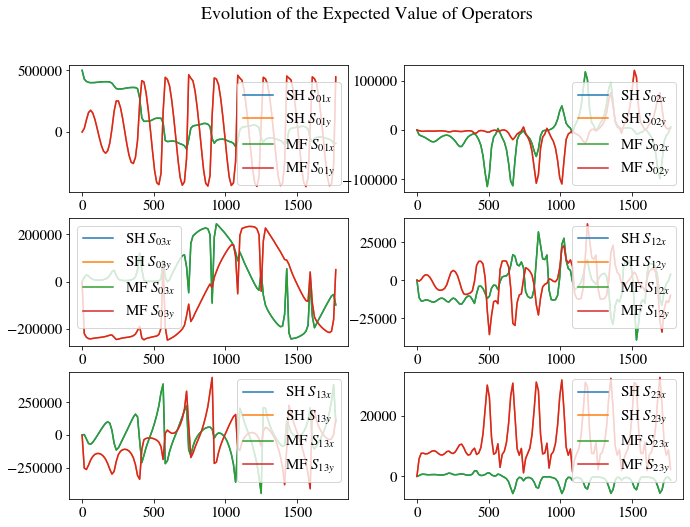

In [315]:
decimals=4


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Evolution of the Expected Value of Operators')
yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)

mfyeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)

ax1.plot(N*time_alt*GammaR, xeSH,label="SH $ S_{01x}$")
ax1.plot(N*time_alt*GammaR, yeSH,label="SH $ S_{01y}$")
ax1.plot(N*time_alt*GammaR, mfxeSH,label="MF $ S_{01x}$")
ax1.plot(N*time_alt*GammaR, mfyeSH,label="MF $ S_{01y}$")
ax1.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)

ax2.plot(N*time_alt*GammaR, xeSH,label="SH $ S_{02x}$")
ax2.plot(N*time_alt*GammaR, yeSH,label="SH $ S_{02y}$")
ax2.plot(N*time_alt*GammaR, mfxeSH,label="MF $ S_{02x}$")
ax2.plot(N*time_alt*GammaR, mfyeSH,label="MF $ S_{02y}$")
ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)

ax3.plot(N*time_alt*GammaR, xeSH,label="SH $ S_{03x}$")
ax3.plot(N*time_alt*GammaR, yeSH,label="SH $ S_{03y}$")
ax3.plot(N*time_alt*GammaR, mfxeSH,label="MF $ S_{03x}$")
ax3.plot(N*time_alt*GammaR, mfyeSH,label="MF $ S_{03y}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)

ax4.plot(N*time_alt*GammaR, xeSH,label="SH $ S_{12x}$")
ax4.plot(N*time_alt*GammaR, yeSH,label="SH $ S_{12y}$")
ax4.plot(N*time_alt*GammaR, mfxeSH,label="MF $ S_{12x}$")
ax4.plot(N*time_alt*GammaR, mfyeSH,label="MF $ S_{12y}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)

ax5.plot(N*time_alt*GammaR, xeSH,label="SH $ S_{13x}$")
ax5.plot(N*time_alt*GammaR, yeSH,label="SH $ S_{13y}$")
ax5.plot(N*time_alt*GammaR, mfxeSH,label="MF $ S_{13x}$")
ax5.plot(N*time_alt*GammaR, mfyeSH,label="MF $ S_{13y}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)

ax6.plot(N*time_alt*GammaR, xeSH,label="SH $ S_{23x}$")
ax6.plot(N*time_alt*GammaR, yeSH,label="SH $ S_{23y}$")
ax6.plot(N*time_alt*GammaR, mfxeSH,label="MF $ S_{23x}$")
ax6.plot(N*time_alt*GammaR, mfyeSH,label="MF $ S_{23y}$")
ax6.legend()

#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

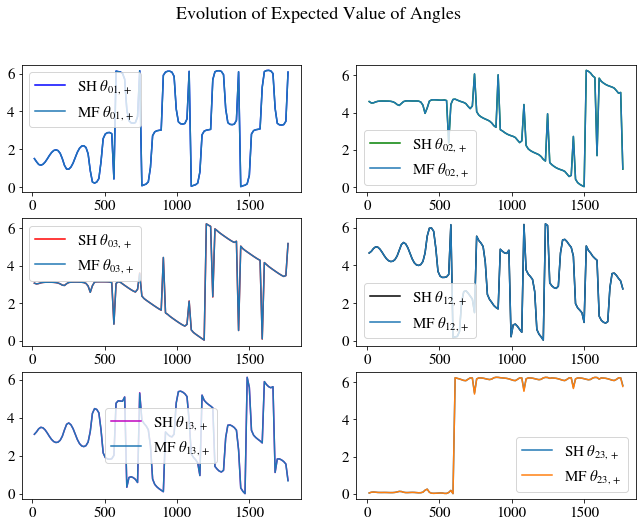

In [316]:
decimals=3
start=1

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Evolution of Expected Value of Angles')


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)
ax1.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],'b',label="SH $\\theta_{01,+}$")

yeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)
ax1.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{01,+}$")

ax1.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)
ax2.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],'g',label="SH $\\theta_{02,+}$")

yeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)
ax2.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{02,+}$")
ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)
ax3.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],'r',label="SH $ \\theta_{03,+}$")

yeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)
ax3.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{03,+}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)
ax4.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],'k',label="SH $\\theta_{12,+}$")

yeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)
ax4.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{12,+}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)
ax5.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],'m',label="SH $\\theta_{13,+}$")

yeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)
ax5.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{13,+}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)
ax6.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],'',label="SH $\\theta_{23,+}$")


yeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)
ax6.plot(N*GammaR*time_alt[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{23,+}$")
ax6.legend()


#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

In [317]:
    Eigenvalues=scipy.linalg.eig( Cov_series[ 0 ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]
    Eigenvalues

array([1.85994235e-10+0.j, 6.05415442e-09+0.j, 6.25518584e-09+0.j,
       6.50495971e-09+0.j, 7.07496620e-09+0.j, 1.26766497e-08+0.j,
       1.06847564e-07+0.j, 1.15091742e-07+0.j, 2.28656903e-07+0.j,
       9.23436511e-01+0.j, 9.53198244e-01+0.j, 9.90906650e-01+0.j,
       9.96371001e-01+0.j, 1.03487342e+00+0.j, 1.05822383e+00+0.j])

In [318]:
    Eigenvalues=scipy.linalg.eig( Cov_series[ -1 ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]
    Eigenvalues

array([1.06873538e-06+0.j, 4.81053484e-05+0.j, 5.35244942e-05+0.j,
       8.59172448e-03+0.j, 9.76735276e-03+0.j, 1.96968724e-02+0.j,
       8.76387652e-02+0.j, 4.27963593e-01+0.j, 9.31210496e-01+0.j,
       1.03175254e+00+0.j, 2.35017600e+00+0.j, 7.23075294e+00+0.j,
       4.03377489e+01+0.j, 6.14766486e+02+0.j, 3.44712649e+04+0.j])

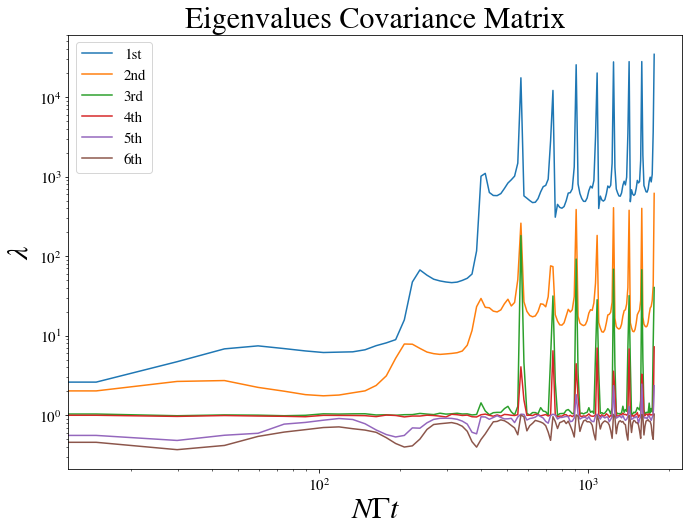

In [319]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_1[:indep]),label="1st")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_2[:indep]),label="2nd")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_3[:indep]),label="3rd")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_4[:indep]),label="4th")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_5[:indep]),label="5th")
plt.plot(N*time_alt[:indep]*GammaR,np.real(Eig_6[:indep]),label="6th")
plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.savefig('foo.pdf')

In [320]:
np.min(Eig_6[:indep])

(0.3689568099032463+0j)

In [321]:
fractionRx

0.95